In [3]:
################ tunable parameters

input_file1='default.rules.csv'
# input_file1='borderline1.rules.csv'
input_file1='input-borderline1.rules.csv'
input_file1='input-borderline1-Copy1.rules.csv'
input_file1='input-ltl-r2-2.rules.csv'
input_file1='input-ltl-r2-12.rules.csv'
input_file1='input-ltl-r2-18.rules.csv'

output_file1='output-2.rules.csv'
output_file1='output-borderline1-2.rules.csv'
output_file1='output-ltl-r2-02.rules.csv'

#unit1=100#1250#600#1500#800#900#400#200#100#50#1000#256#128
##wt=1800##3000#2400#1800#1500#1200#900#700
w2=1600#800#200#500#400#200#100#50#1000#256#128#16#25
h2=30#w2#16
#maxtime=4*unit1 #*2
maxtime=w2#*2 #*4#*2
halftime=maxtime//2
##niter =wt#600#500#400#300#6##1000#500###800 # #1500
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
#step2=120#12#60 #120 #1


<IPython.core.display.Javascript object>


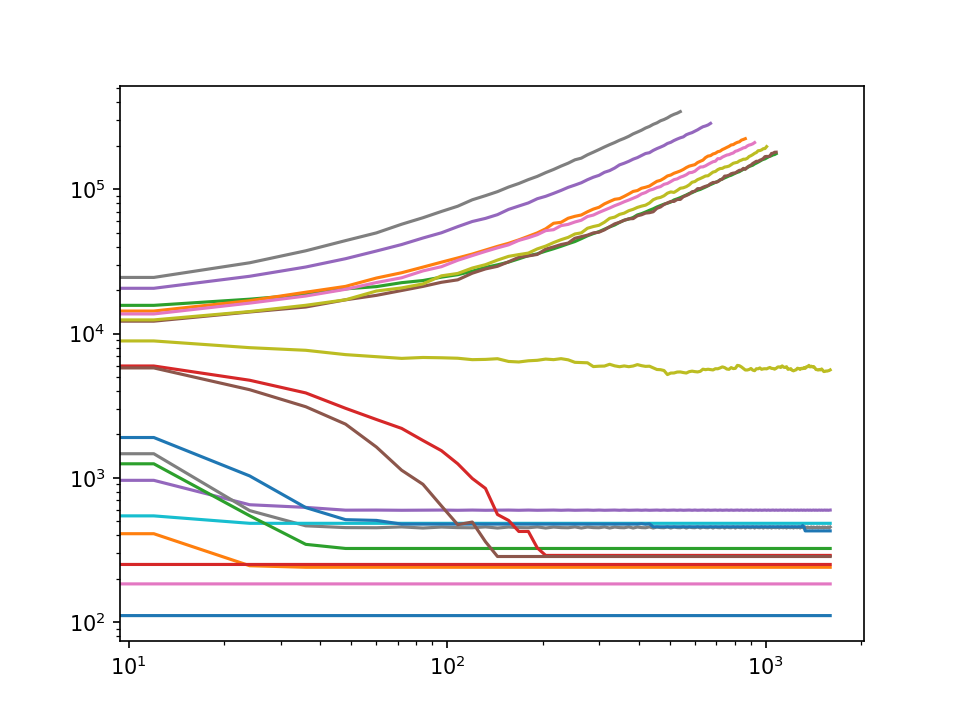

tag1 time_s time11 pop_s population ratio_s PPratio space_s w2 h2 w h rule_s rulespace rulestr x sumpop
soup time 1596 pop 111 ratio 1.0 space 1600 30 1267 26 rule lifelib r2b7t7s7t9 sumpop 178680 
soup time 1596 pop 240 ratio 1.0 space 1600 30 1566 32 rule lifelib r2b7t7s7t10 sumpop 410496 
soup time 1092 pop 178483 ratio 2.0 space 1600 30 2276 504 rule lifelib r2b7t7s7t11 sumpop 100140180 
soup time 1596 pop 251 ratio 1.0 space 1600 30 1482 32 rule lifelib r2b7t8s7t9 sumpop 404940 
soup time 1596 pop 598 ratio 1.0 space 1600 30 1583 652 rule lifelib r2b7t8s7t10 sumpop 993936 
soup time 1092 pop 183889 ratio 2.2 space 1600 30 2359 858 rule lifelib r2b7t8s7t11 sumpop 100752324 
soup time 1596 pop 184 ratio 1.0 space 1600 30 1586 24 rule lifelib r2b7t9s7t9 sumpop 302052 
soup time 1596 pop 456 ratio 1.0 space 1600 30 2284 1578 rule lifelib r2b7t9s7t10 sumpop 777564 
soup time 1020 pop 199915 ratio 2.1 space 1600 30 2861 1170 rule lifelib r2b7t9s7t11 sumpop 101541072 
soup time 1596 pop 

In [4]:
from __future__ import print_function
#program version 314

%matplotlib notebook
##%matplotlib inline
from matplotlib import pyplot as plt

import math
import lifelib


###################

plt.figure()

##plt.yscale('log')
plt.loglog()

plt.ion()
##plt.ioff()

###################


#schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,x,sumpop'
print(schema1.replace(',',' '))

###################


with open(input_file1) as f0:
    input1=f0.read()

sp0=input1.splitlines()

for sp01 in sp0:
    sp5=sp01.split()
    #print(sp5)
    i5=sp5.index('lifelib')
    rulestr=sp5[i5+1]
    #print(rulestr)
    space1=' '
    rest1=space1.join(sp5[i5+2:])
    #print(rest1)
    
#for dbs in range(-ndbs,ndbs+1):
##for dbs in range(-1,2):
##for dbmax in range(ndbmax):

    #bmin=bmin0#+dbs
    #bmax=bmax0+dbs
    #smin=smin0#+dbs
    #smax=smax0#+dbs

    #rulestr='b3s23'
    #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
    #rulestr='b{}s23'.format(bmax)
    ######rulestr='r1b3t{}s3t4'.format(bmax)
    ##rulestr='r2b7t12s7t10'.format(bmax)
    #rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)
    
    #rulestr=lifelib.sanirule(rulestr)
    sess = lifelib.load_rules(rulestr)
    #sess = lifelib.load_rules('r2b7t12s7t10')
    #sess = lifelib.load_rules('r2b7t9s7t10')

    lt = sess.lifetree()

    p1=lt.pattern()
    p=0.3###08#02#05 #1#2#3#4#5 
    p1[0:h2, 0:w2] = p

    ################################


    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    #####p1 = p1[niter]

    population_niter = None
    sumpopeverygen=0
    
    ##currgen = 0
    ##for _ in range(int(niter/step2)):
    for currgen in range(0,  maxtime, step1):
        
        ####
        
        p1=p1[step1]
        
        ####
        sumpopeverygen += p1.population * step1
        
        if sumpopeverygen> 100e6:#500e6:
            break
        
        ####
        
        if currgen//step1 == halftime//step1:
            population=p1.population ;  population_niter = population


        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
            
            
#     !free -m

    #######################################

    plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
#     plt.plot(gens, ys)
    plt.show()

    
    #######################################

#     bb=p1.bounding_box
#     print(bb)

#     h=1
#     w=1
#     if bb:
#         h=bb[2]-bb[0]
#         w=bb[3]-bb[1]

#     tag1='soup'
#     time_s='time'
#     time11=niter
#     pop_s='pop'
#     space_s='space'
#     rule_s='rule'
#     rulespace='lifelib'

    #print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)

    #######################################

    #####p1 = p1[niter]

    #######################################

    bb=p1.bounding_box
    #print(bb)

    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=currgen  ###  maxtime
    pop_s='pop'
    population=p1.population ;  population_2niter = population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    ratio_s='ratio'
    ######fPPratio= population_2niter/population_niter
    #######fPPratio= population_2niter/(population_niter+1)
    fPPratio= population_2niter/(pops[currgen//step1//2]+1)
    PPratio= '{:.1f}'.format(fPPratio)
    #log2PP= '{:.1f}'.format(math.log2(fPPratio) )

    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1)
    print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    with open(output_file1,'a') as f1:
        #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, file=f1)
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,  'sumpop' , sumpopeverygen,    rest1, file=f1)

    
    #####################################
    del p1
    del lt
    del sess
    #!free -m

!free -m


In [5]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1221        2264          28         942        2925
Swap:           759          23         735
  499 martin    20   0 1011772 115544  34232 S  0,0  2,5   0:01.31 python3
 1321 martin    20   0   52672  12880   7344 S  0,0  0,3   0:00.00 python3
 1371 martin    20   0   52672  12852   7316 S  0,0  0,3   0:00.00 python3
 1406 martin    20   0   52672  12880   7344 S  0,0  0,3   0:00.01 python3
 1411 martin    20   0   52672  12880   7344 S  0,0  0,3   0:00.00 python3
 1417 martin    20   0   52672  12876   7344 S  0,0  0,3   0:00.00 python3
 1434 martin    20   0   52748  12816   7284 S  0,0  0,3   0:00.00 python3
 1858 martin    20   0  336408  63224  13648 S  0,0  1,4   1:38.07 jupyter-not+
 2419 martin    20   0   52672  12852   7316 S  0,0  0,3   0:00.00 python3
 2424 martin    20   0   52672  12852   7316 S  0,0  0,3   0:00.00 python3
 2429 martin    20   0   52748  12820   7

In [35]:
#
import sys

try:
    sess = lifelib.load_rules('sffdsdfsfd')
    #1/0
except:
    exc_info1=sys.exc_info()
    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
    print("error:", exc_info1[0], exc_info1[1])
    #raise

Generating code for rules ['sffdsdfsfd']...
error: <class 'ValueError'> Rule "sffdsdfsfd" does not belong to any genus


In [25]:
math.exp(0.7*math.log(2))

1.624504792712471